In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
import datetime as dt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
def metric(ret):
    print(empyrical.annual_return(ret))
    print(empyrical.annual_volatility(ret))
    print(empyrical.max_drawdown(ret))
    print(empyrical.sharpe_ratio(ret, risk_free=0.015/360))

In [4]:
start_date = '2014-01-01'

In [5]:
weight_19 = pd.read_excel('../data/1090_all_wgts.xlsx')
weight_28 = pd.read_excel('../data/2080_all_wgts.xlsx')
weight_46 = pd.read_excel('../data/4060_all_wgts.xlsx')

In [6]:
weight_19 = weight_19[weight_19.index >= start_date]
weight_28 = weight_28[weight_28.index >= start_date]
weight_46 = weight_46[weight_46.index >= start_date]

In [7]:
weight_19.tail(n=1)

,cn_equity_li,cn_bond_li,cn_equity_li2,cn_bond_li2
2020-05-11,0.125789,0.874211,0.124762,0.875238


In [8]:
weight_28.tail(n=1)

,cn_equity_li,cn_bond_li,cn_equity_li2,cn_bond_li2
2020-05-11,0.204623,0.795377,0.203602,0.796398


In [9]:
weight_46.tail(n=1)

,cn_equity_li,cn_bond_li,cn_equity_li2,cn_bond_li2
2020-05-11,0.378173,0.621827,0.377165,0.622835


In [10]:
end_date = weight_19.index[-1]

# 计算行业基金收益率

In [11]:
sfund = pd.read_excel('../data/基金池.xlsx', sheet_name='行业')

In [12]:
data = w.wsd(sfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [13]:
sfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [14]:
sfund_nav_ret = sfund_nav.pct_change()

In [15]:
sector_fund_ret = 0.15 * sfund_nav_ret[sfund[sfund['tag'] == '金融地产']['code']].mean(axis=1) + \
                  0.35 * sfund_nav_ret[sfund[sfund['tag'] == '可选消费']['code']].mean(axis=1) + \
                  0.15 * sfund_nav_ret[sfund[sfund['tag'] == '必选医药']['code']].mean(axis=1) + \
                  0.35 * sfund_nav_ret[sfund[sfund['tag'] == '信息科技']['code']].mean(axis=1)

# 计算全市场基金收益率

In [16]:
fund = pd.read_excel('../data/基金池.xlsx', sheet_name='全市场')

In [17]:
data = w.wsd(fund['code'].tolist(), 'nav_adj', start_date, end_date)

In [18]:
fund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [19]:
fund_ret = fund_nav.pct_change()

In [20]:
fund_pf_ret = fund_ret.mean(axis=1)

# 计算债券基金收益率

In [21]:
bfund = pd.read_excel('../data/基金池.xlsx', sheet_name='债券')

In [22]:
data = w.wsd(bfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [23]:
bfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [24]:
bfund_ret = bfund_nav.pct_change()

In [25]:
bfund_pf_ret = bfund_ret.mean(axis=1)

# 计算组合收益率

In [26]:
pf_ret_19 = weight_19['cn_bond_li'] * bfund_pf_ret + weight_19['cn_equity_li'] * fund_pf_ret * 0.5 + weight_28['cn_equity_li'] * sector_fund_ret * 0.5
pf_ret_28 = weight_19['cn_bond_li'] * bfund_pf_ret + weight_28['cn_equity_li'] * fund_pf_ret * 0.5 + weight_28['cn_equity_li'] * sector_fund_ret * 0.5
pf_ret_46 = weight_46['cn_bond_li'] * bfund_pf_ret + weight_46['cn_equity_li'] * fund_pf_ret * 0.5 + weight_46['cn_equity_li'] * sector_fund_ret * 0.5

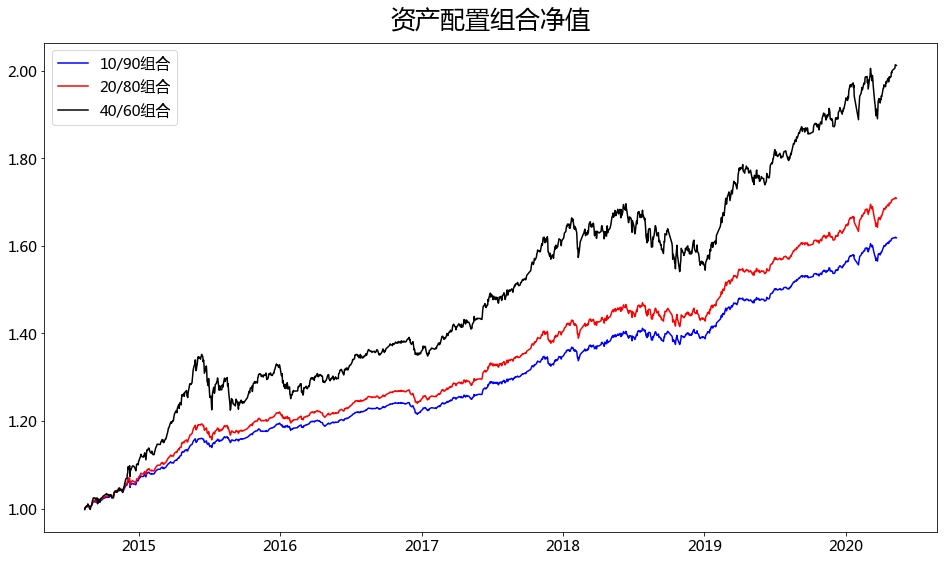

In [27]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_19).cumprod(), label='10/90组合', color='blue')
ax.plot((1 + pf_ret_28).cumprod(), label='20/80组合', color='red')
ax.plot((1 + pf_ret_46).cumprod(), label='40/60组合', color='black')

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('资产配置组合净值', fontsize=25, y=1.02)

In [28]:
metric(pf_ret_19)

0.08155471494243693
0.03157339404867815
-0.02618342240625446
2.4353709716746956


In [29]:
metric(pf_ret_28)

0.09117611611252507
0.04017896917393903
-0.036971843533170894
2.1658022933840324


In [30]:
metric(pf_ret_46)

0.12060646685510323
0.0797684455207078
-0.09417584619757308
1.4905777665375786
